# Yearly Total Economic Damage Analysis

This section analyzes the total economic damage caused by hurricanes over the years.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [3]:
# Load the Yearly EMDAT Data
yearly_data = pd.read_csv('Resource/yearly_emdat_data.csv')

In [4]:
# Extract the necessary columns for the analysis
yearly_damage_data = yearly_data[['Start Year', 'Total Damage (\'000 US$)']]
yearly_damage_data

,Start Year,Total Damage ('000 US$)
0,2001,400000.0
1,2002,640000.0
2,2002,300000.0
3,2003,3370000.0
4,2004,16000000.0
5,2005,125000000.0
6,2005,16000000.0
7,2005,14300000.0
8,2007,600000.0
9,2008,30000000.0


In [5]:
# Sum the total damages by year
yearly_total_damage = yearly_damage_data.groupby('Start Year').sum()
yearly_total_damage

,Total Damage ('000 US$)
Start Year,
2001,400000.0
2002,940000.0
2003,3370000.0
2004,16000000.0
2005,155300000.0
2007,600000.0
2008,30000000.0
2010,3900000.0
2011,750000.0


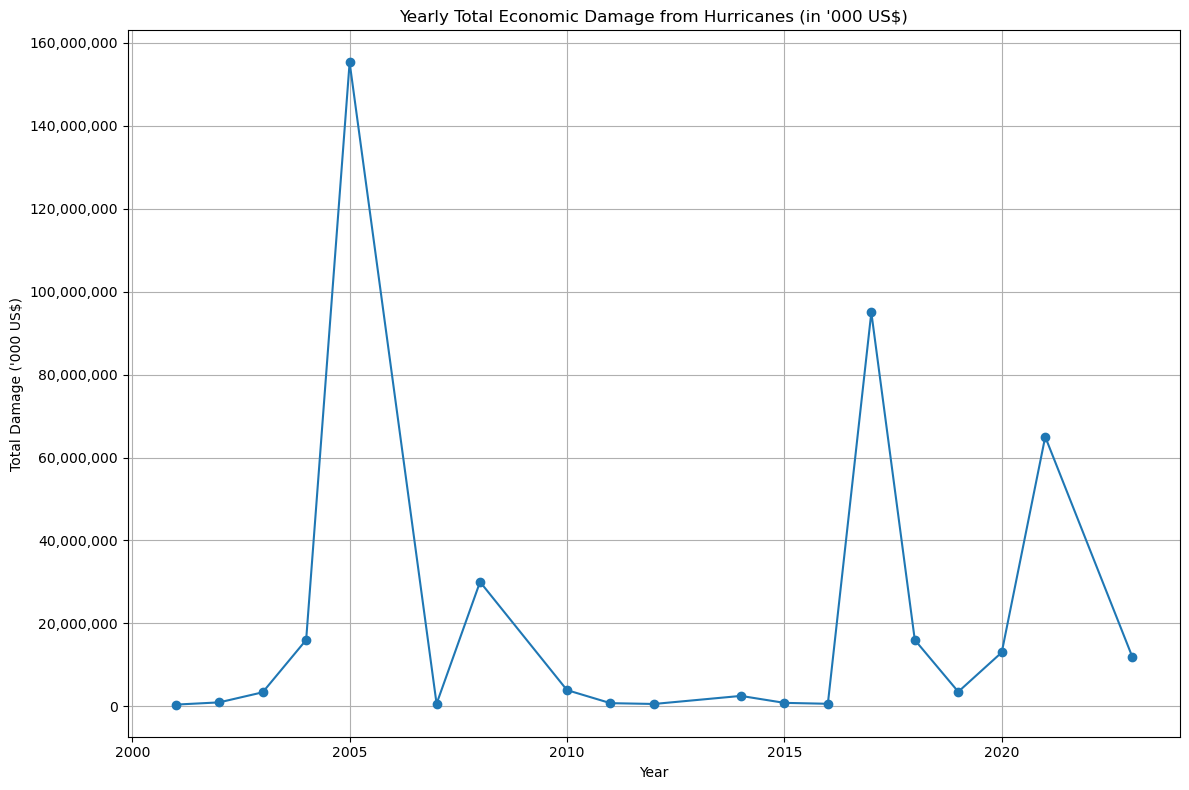

In [6]:
# Plot the yearly total economic damage
plt.figure(figsize=(12, 8))
ax = plt.plot(yearly_total_damage.index, yearly_total_damage['Total Damage (\'000 US$)'], marker='o')
plt.title('Yearly Total Economic Damage from Hurricanes (in \'000 US$)')
plt.xlabel('Year')
plt.ylabel('Total Damage (\'000 US$)') 
plt.grid(True) 
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.tight_layout() 
plt.savefig('Images/Yearly_Total_Economic_Damage.png')
plt.show()  # Display the plot


# Regional Economic Damage Comparison

This section compares the total economic damage caused by hurricanes across different regions.

In [6]:
yearly_data2 = pd.read_csv('Resource/emdat_data_map.csv')

In [7]:
# Extract the necessary columns for the analysis
state_damage_data = yearly_data2[['Start Year', 'Location', 'Total Damage (\'000 US$)']]
state_damage_data

,Start Year,Location,Total Damage ('000 US$)
0,2001,Baja California Sur,400000.0
1,2002,Campeche,640000.0
2,2002,Quintana Roo,640000.0
3,2002,Yucatan,640000.0
4,2002,Louisiana,300000.0
...,...,...,...
209,2021,Connecticut,65000000.0
210,2021,Virginia,65000000.0
211,2021,Pennsylvania,65000000.0
212,2021,Delaware,65000000.0


In [8]:
# Sort the data by Total Damage
sorted_state_damage = state_damage_data.sort_values('Total Damage (\'000 US$)', ascending=False)
sorted_state_damage

,Start Year,Location,Total Damage ('000 US$)
41,2005,New Orleans City,125000000.0
36,2005,Mobile,125000000.0
52,2005,Georgia,125000000.0
51,2005,Mississippi,125000000.0
50,2005,Waveland,125000000.0
...,...,...,...
0,2001,Baja California Sur,400000.0
7,2002,Tennessee,300000.0
6,2002,Alabama,300000.0
5,2002,Mississippi,300000.0


In [9]:
# Remove duplicates based on Total Damage (to handle multiple locations with the same damage)
unique_state_damage = sorted_state_damage.drop_duplicates(subset='Total Damage (\'000 US$)')
unique_state_damage

,Start Year,Location,Total Damage ('000 US$)
41,2005,New Orleans City,125000000.0
159,2017,Madison,95000000.0
209,2021,Connecticut,65000000.0
76,2008,Illinois,30000000.0
18,2004,Escambia,16000000.0
57,2005,Florida Keys,14300000.0
202,2020,Texas,13000000.0
213,2023,Acapulco (Central Guerrero State),12000000.0
83,2010,Tabasco,3900000.0
200,2019,Texas,3500000.0


In [10]:
# Select the top 10 unique Total Damage values
top_10_state_damage = unique_state_damage.head(10)
top_10_state_damage

,Start Year,Location,Total Damage ('000 US$)
41,2005,New Orleans City,125000000.0
159,2017,Madison,95000000.0
209,2021,Connecticut,65000000.0
76,2008,Illinois,30000000.0
18,2004,Escambia,16000000.0
57,2005,Florida Keys,14300000.0
202,2020,Texas,13000000.0
213,2023,Acapulco (Central Guerrero State),12000000.0
83,2010,Tabasco,3900000.0
200,2019,Texas,3500000.0


In [13]:
# Replace the specific location name using loc[] to avoid SettingWithCopyWarning
top_10_state_damage.loc[top_10_state_damage['Location'] == 'Acapulco (Central Guerrero State)', 'Location'] = 'Acapulco (C.G.S)'
top_10_state_damage

,Start Year,Location,Total Damage ('000 US$)
41,2005,New Orleans City,125000000.0
159,2017,Madison,95000000.0
209,2021,Connecticut,65000000.0
76,2008,Illinois,30000000.0
18,2004,Escambia,16000000.0
57,2005,Florida Keys,14300000.0
202,2020,Texas,13000000.0
213,2023,Acapulco (C.G.S),12000000.0
83,2010,Tabasco,3900000.0
200,2019,Texas,3500000.0


<Figure size 1500x1000 with 0 Axes>

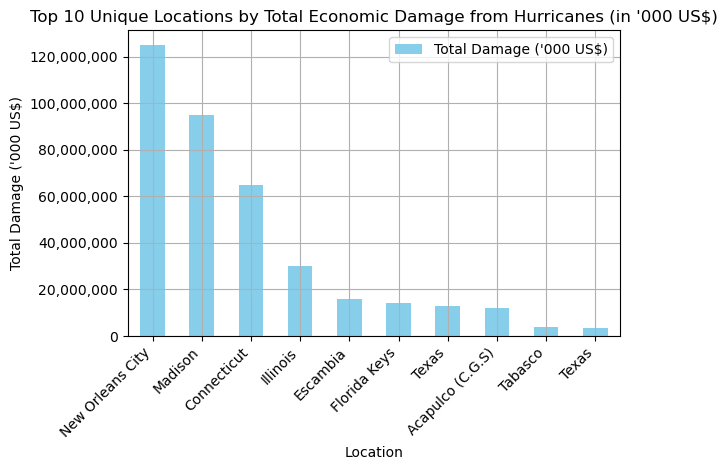

In [15]:
# Plot the top 10 unique Total Damage values
plt.figure(figsize=(15, 10))
ax = top_10_state_damage.plot(kind='bar', x='Location', y='Total Damage (\'000 US$)', color='skyblue')
plt.title('Top 10 Unique Locations by Total Economic Damage from Hurricanes (in \'000 US$)')
plt.xlabel('Location')
plt.ylabel('Total Damage (\'000 US$)')
plt.xticks(rotation=45, ha='right')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.grid(True)
plt.tight_layout()
#plt.savefig('Images/Top_10_Unique_Locations_Damage_Comparison.png')  # Save the figure
plt.show()